Import Libraries, data and Initialisation

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans,DBSCAN

In [13]:
file_path = r"C:\MSc DTU\Semester 1\00. Introduction to BA\Assignment\city-bike\data\Trips_2018\Trips_2018.csv"
data = pd.read_csv(file_path)

In [41]:
# Get unique station IDs and their coordinates from both start and end stations
stations_start = data[['start_station_id', 'start_station_latitude', 'start_station_longitude']].drop_duplicates()
stations_end = data[['end_station_id', 'end_station_latitude', 'end_station_longitude']].drop_duplicates()

# Rename columns for consistency
stations_start.columns = ['station_id', 'latitude', 'longitude']
stations_end.columns = ['station_id', 'latitude', 'longitude']

# Combine and keep unique station IDs
stations_combined = pd.concat([stations_start, stations_end], ignore_index=True)
stations_coordinates = stations_combined.drop_duplicates(subset='station_id')

print(f"Total unique stations with coordinates: {len(stations_coordinates)}")
print(stations_coordinates.head(10))

#Check outliers
stations_coordinates = stations_coordinates[(stations_coordinates['latitude'].between(40.45, 40.92)) & (stations_coordinates['longitude'].between(-74.30, -73.65))]

Total unique stations with coordinates: 851
   station_id   latitude  longitude
0        72.0  40.767272 -73.993929
1        79.0  40.719116 -74.006667
2        82.0  40.711174 -74.000165
3        83.0  40.683826 -73.976323
4       119.0  40.696089 -73.978034
5       120.0  40.686768 -73.959282
6       127.0  40.731724 -74.006744
7       128.0  40.727103 -74.002971
8       143.0  40.692395 -73.993379
9       144.0  40.698399 -73.980689


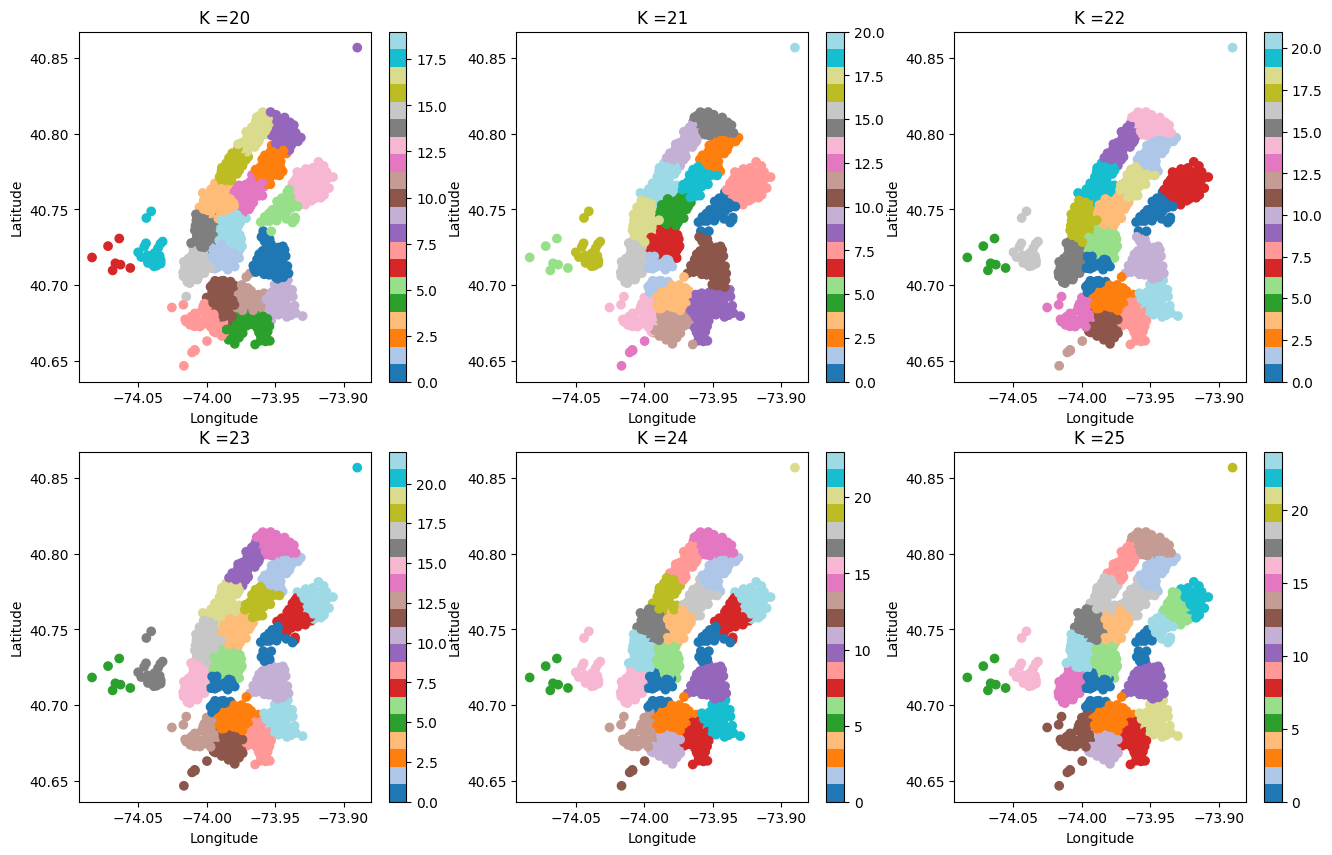

In [45]:
# Different k values
k_values = [20, 21, 22, 23, 24, 25]

#Plot the clustering results for different k values for k-means clustering
fig,axes = plt.subplots(2,3,figsize=(16,10))
axes = axes.ravel()

for i,k in enumerate(k_values):
    #Fit k-means
    kmeans = KMeans(n_clusters=k,random_state=1)
    clusters = kmeans.fit_predict(stations_coordinates[['latitude', 'longitude']])

    # Add cluster assignment as a new column for each k
    stations_coordinates[f'cluster_{k}'] = clusters

    scatter = axes[i].scatter(stations_coordinates['longitude'],stations_coordinates['latitude'],c=clusters,cmap='tab20')
    axes[i].set_title(f'K ={k}')
    axes[i].set_xlabel('Longitude')
    axes[i].set_ylabel('Latitude')
    plt.colorbar(scatter,ax=axes[i])

plt.show()

In [50]:
db_station_coordinates = stations_coordinates

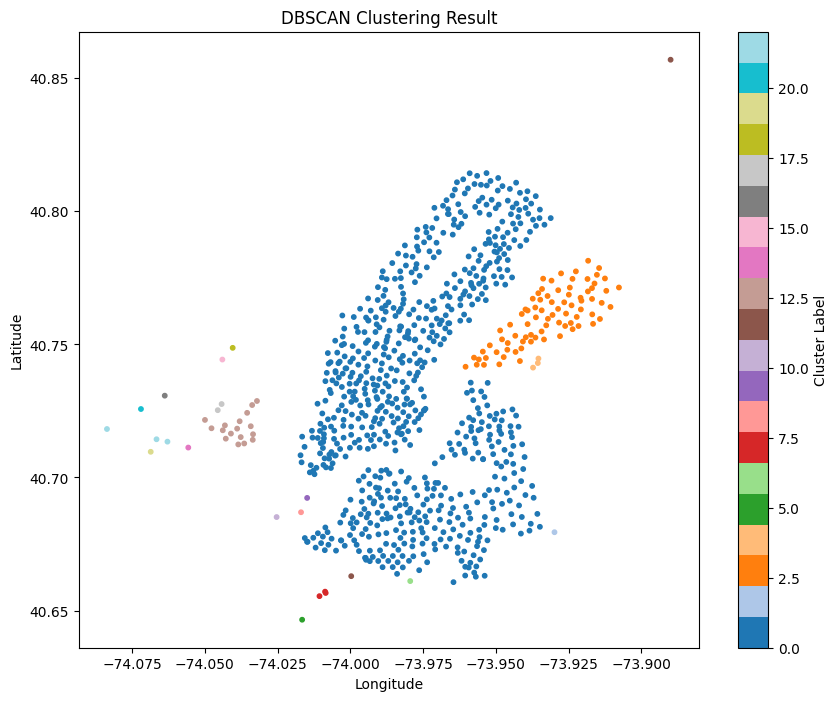

Number of clusters: 22
Number of noise points: 0


In [83]:
# DBSCAN parameters: you can adjust eps and min_samples
eps = 0.005  # Maximum distance between two samples for them to be considered in the same cluster
min_samples = 1  # Minimum number of samples in a neighborhood for a point to be considered a core point

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(db_station_coordinates[['latitude','longitude']])

# Add cluster assignment as a new column
db_station_coordinates['cluster_dbscan'] = clusters

# Visualize the result
plt.figure(figsize=(10, 8))
plt.scatter(db_station_coordinates['longitude'], db_station_coordinates['latitude'],
            c=db_station_coordinates['cluster_dbscan'], cmap='tab20', s=10)
plt.title('DBSCAN Clustering Result')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster Label')
plt.show()

print(f"Number of clusters: {len(set(db_station_coordinates['cluster_dbscan']))-1}")  # -1 because -1 means noise
print(f"Number of noise points: {list(db_station_coordinates['cluster_dbscan']).count(-1)}")